In [1]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import warnings
import seaborn as sns
sns.set(style='darkgrid',font = 'SinHei',rc={'axes.unicode_minus':False})
warnings.filterwarnings('ignore')

In [2]:
pwd

'C:\\Users\\lining\\Desktop\\myjob\\My_SQL\\数据结构'

In [3]:
data = pd.read_csv('C:\\Users\\lining\\Desktop\\myjob\\My_SQL\\aqi_statistic_analysis.csv')

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 325 entries, 0 to 324
Data columns (total 12 columns):
City                       325 non-null object
AQI                        325 non-null int64
Precipitation              321 non-null float64
GDP                        325 non-null float64
Temperature                325 non-null float64
Longitude                  325 non-null float64
Latitude                   325 non-null float64
Altitude                   325 non-null float64
PopulationDensity          325 non-null int64
Coastal                    325 non-null int64
GreenCoverageRate          325 non-null float64
Incineration(10,000ton)    325 non-null float64
dtypes: float64(8), int64(3), object(1)
memory usage: 30.5+ KB


0.27360760671177387


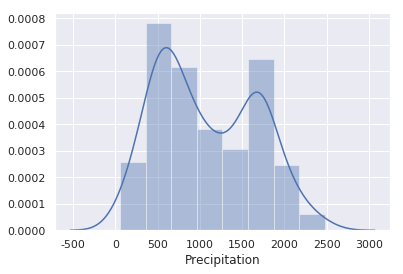

In [5]:
print(data['Precipitation'].skew())
sns.distplot(data['Precipitation'].dropna())

In [6]:
data.fillna({'Precipitation':data['Precipitation'].median()},inplace=True)

## 异常值处理

#### 通过describe 查看数值信息

#### 配合箱线图辅助

In [7]:
data.describe()

,AQI,Precipitation,GDP,Temperature,Longitude,Latitude,Altitude,PopulationDensity,Coastal,GreenCoverageRate,"Incineration(10,000ton)"
count,325.000000,325.0000,325.000000,325.000000,325.000000,325.000000,325.000000,325.000000,325.000000,325.000000,325.000000
mean,75.809231,1079.3520,2390.901815,15.980149,113.990609,31.870665,380.141846,2610.883077,0.246154,38.347969,52.315108
std,43.610516,583.5252,3254.876921,5.016133,7.688515,6.093703,741.409703,2910.679547,0.431433,6.319706,91.707838
min,12.000000,56.1000,22.500000,-2.500000,80.105800,18.234043,-12.000000,1.000000,0.000000,7.600000,1.530000
25%,45.000000,581.0000,762.970000,13.727397,111.130000,27.695387,18.000000,721.000000,0.000000,35.530000,18.890000
50%,69.000000,920.0000,1328.520000,16.494521,115.500183,31.385597,62.000000,1790.000000,0.000000,38.690000,24.000000
75%,102.000000,1651.0000,2735.340000,18.921918,119.823308,36.449432,354.000000,3517.000000,0.000000,42.620000,37.630000
max,296.000000,2478.1000,24964.990000,27.447945,129.598496,49.220000,4505.000000,25900.000000,1.000000,76.490000,686.670000


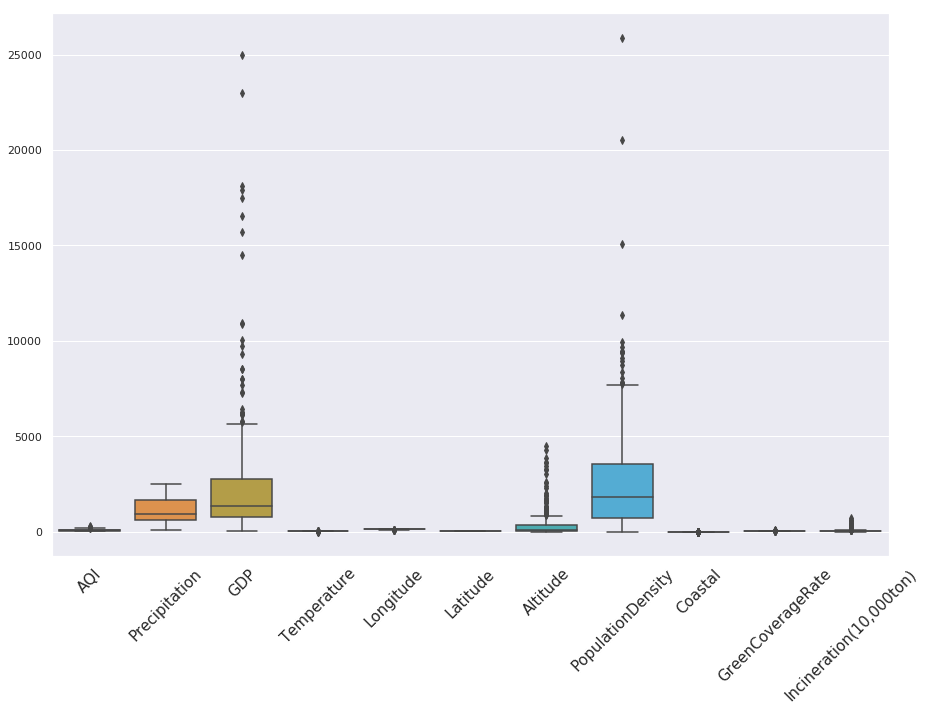

In [8]:
plt.figure(figsize=(15,10))
plt.xticks(rotation =45,fontsize=15)
sns.boxplot(data=data)


In [9]:
t=data.copy()
for k in t:
    if pd.api.types.is_numeric_dtype(t[k]):
        o = t[k].describe()
        IQR = o['75%'] - o['25%']
        lower =o['25%'] - 1.5*IQR
        upper =o['75%'] - 1.5*IQR
        t[k][t[k] < lower] = lower
        t[k][t[k] > upper] = upper
        
        
        

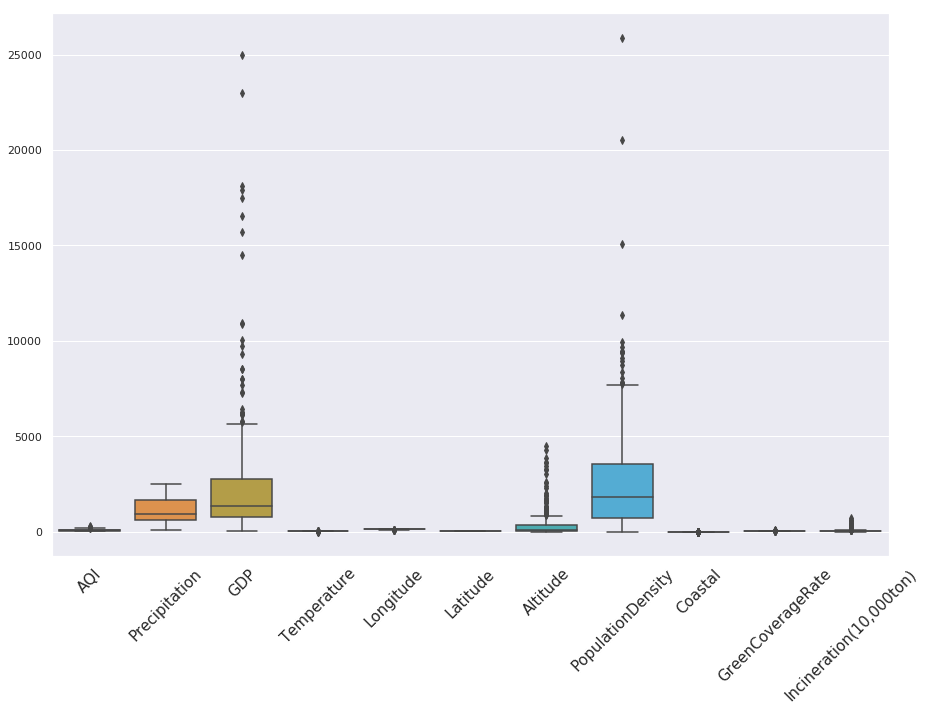

In [10]:
plt.figure(figsize=(15,10))
plt.xticks(rotation =45,fontsize=15)
sns.boxplot(data=data)

# 重复值处理

In [11]:
data.duplicated().sum()

2

In [12]:
data.drop_duplicates(inplace=True)

# 空气质量最好/最差的5个城市


In [13]:
t = data[['City','AQI']].sort_values('AQI')
display(t.iloc[:5])

,City,AQI
204,Shaoguan City,12
163,Nanping City,12
154,Meizhou City,12
91,Keelung City,13
195,Sanming City,13


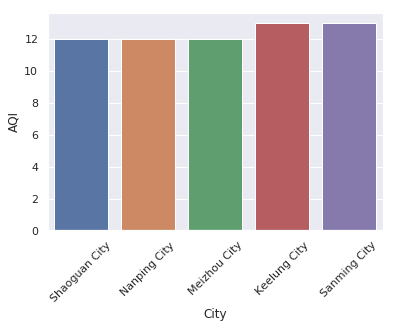

In [14]:
plt.xticks(rotation = 45 )
sns.barplot(x ='City',y='AQI',data =t.iloc[:5])

# 最差

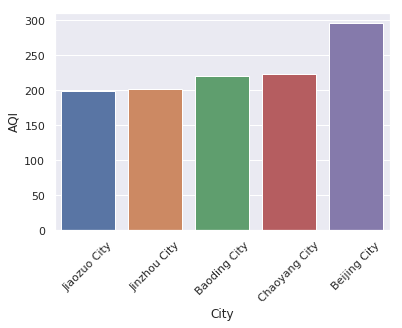

In [15]:

plt.xticks(rotation = 45 )
sns.barplot(x ='City',y='AQI',data =t.iloc[-5:])

# 等级统计

In [16]:
def value_to_level(AQI):
    if AQI >0 and AQI <=50:
        return '一级'
    elif AQI >=51 and AQI <=100:
        return '二级'
    elif AQI >=101 and AQI <=150:
        return '三级'
    elif AQI >=150 and AQI <=200:
        return '四级'
    elif AQI >=200 and AQI <=250:
        return '五级'
    else:
        return '六级'
    

In [17]:
level = data['AQI'].apply(value_to_level)

In [18]:
display(level.value_counts())

二级    136
一级    103
三级     66
四级     14
五级      3
六级      1
Name: AQI, dtype: int64

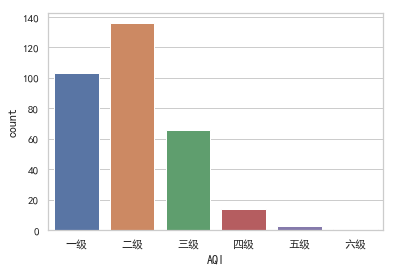

In [19]:
%matplotlib inline
# %config InlineBackend.figure_format = 'svg'
import matplotlib.pyplot as plt
from numpy.random import randn
import numpy as np
import pandas as pd
import seaborn as sns
#plt.rcParams["font.sans-serif"]='SimHei'#解决中文乱码
plt.rcParams['axes.unicode_minus'] = False#解决负号无法正常显示的问题
sns.set_style('whitegrid',{'font.sans-serif':['simhei','Arial']})
sns.countplot(x=level,order=['一级','二级','三级','四级','五级','六级'])

# 注意版本  conda install seaborn=0.9.0

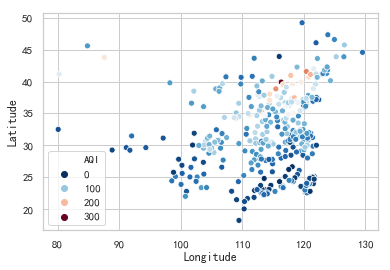

In [20]:
sns.scatterplot(x='Longitude',y='Latitude',hue = 'AQI',palette=plt.cm.RdBu_r,data = data)

sns.version

# 统计推断

In [21]:
data['AQI'].mean()

75.3343653250774

![](./zhongxindingli.png)

In [22]:
all_ = np.random.normal(loc=30,scale=80,size=10000)
mean_arr = np.zeros(1000)
for i in range(len(mean_arr)):
    mean_arr[i] = np.random.choice(all_,size =64,replace=False).mean()

样本均值： 31.418678211719794
样本均方差： 10.127338990214719
偏度： 0.07492932281335765


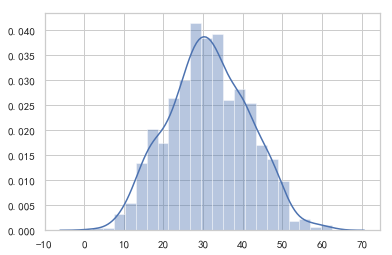

In [23]:
print('样本均值：',mean_arr.mean())
print('样本均方差：',mean_arr.std())
print('偏度：',pd.Series(mean_arr).skew())
sns.distplot(mean_arr)

# 置信区间

![](./zhixinqujian.png)

In [24]:
# 定义标准差
scale =50
x = np.random.normal(0,scale,size=100000)
for times in range(1,4):
    y=x[(x >= -times*scale) & (x <= times*scale)]
    print(f'{times}倍标准差：')
    print(f'{len(y) * 100 /len(x)}%')

1倍标准差：
68.51%
2倍标准差：
95.421%
3倍标准差：
99.699%


 根据中心极限定理，如果多次抽样，则样本均值构成的正态分布。如果我们对总体进行一次抽样，则本次抽样个体的均值有95%的概率会在二倍标准差内，仅仅有的5% 的概率会在二倍标准差之外。根据小概率事件（很小的概率在一次抽样中基本不会发生），

如果抽样的个体均值落在标准之外，我们就可以认为，本次抽样来自总体，**该总体的均值并非我们所期望的均值**

![](./t_jianyan.png)

In [26]:
from scipy import stats
help(stats.ttest_1samp)

Help on function ttest_1samp in module scipy.stats.stats:

ttest_1samp(a, popmean, axis=0, nan_policy='propagate')
    Calculate the T-test for the mean of ONE group of scores.
    
    This is a two-sided test for the null hypothesis that the expected value
    (mean) of a sample of independent observations `a` is equal to the given
    population mean, `popmean`.
    
    Parameters
    ----------
    a : array_like
        sample observation
    popmean : float or array_like
        expected value in null hypothesis, if array_like than it must have the
        same shape as `a` excluding the axis dimension
    axis : int or None, optional
        Axis along which to compute test. If None, compute over the whole
        array `a`.
    nan_policy : {'propagate', 'raise', 'omit'}, optional
        Defines how to handle when input contains nan. 'propagate' returns nan,
        'raise' throws an error, 'omit' performs the calculations ignoring nan
        values. Default is 'propagate'.


In [27]:


r = stats.ttest_1samp(data['AQI'],75)
print('t值：', r.statistic)
print('p值：', r.pvalue)

t值： 0.1397645790492617
p值： 0.8889333799013008


In [28]:
n = len(data)
df = n-1
left = stats.t.ppf(0.025,df=df)
right = stats.t.ppf(0.974,df =df)
print(left,right)
mean = data['AQI'].mean()
std= data['AQI'].std()
mean + left *(std/np.sqrt(n)),mean+right*(std/np.sqrt(n))

-1.9673585853224684 1.9503650549451497


(70.6277615675309, 80.0003146668379)

### 因此我们计算出的全国所有城市平均空气质量所在的置信区间，大致在70-80之间  置信度为 95%

可以看出， P值大于0.05，**所以在显著水平为0.05检验下，我们无法拒绝原假设，因此接受原假设**


# 沿海城市的空气质量是否由于内陆城市


In [30]:
display(data['Coastal'].value_counts())

0    243
1     80
Name: Coastal, dtype: int64

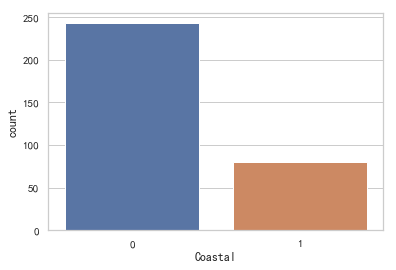

In [31]:
sns.countplot(x='Coastal',data=data)

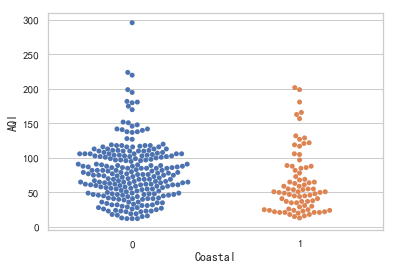

In [32]:
# 沿海城市与内陆城市的散点分布
sns.swarmplot(x='Coastal',y='AQI',data=data)

# 分组计算均值

In [33]:
display(data.groupby('Coastal')['AQI'].mean())

Coastal
0    79.045267
1    64.062500
Name: AQI, dtype: float64

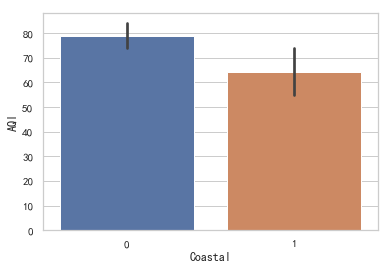

In [34]:
sns.barplot(x='Coastal',y='AQI',data=data)

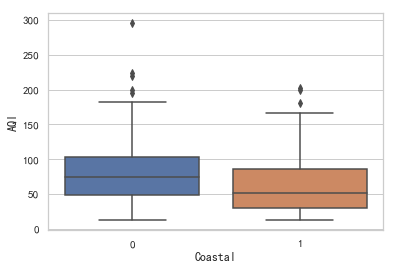

In [35]:
sns.boxplot(x='Coastal',y='AQI',data = data)

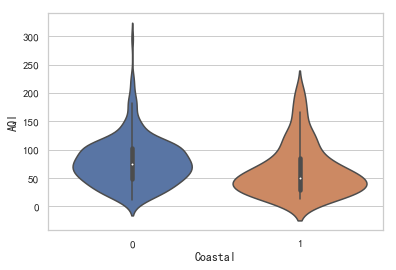

In [36]:
sns.violinplot(x='Coastal',y='AQI',data = data)

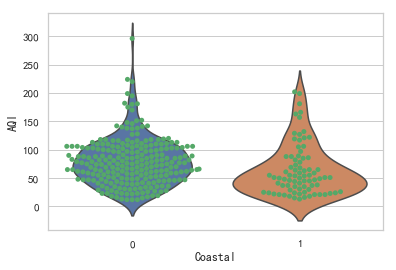

In [37]:
sns.violinplot(x='Coastal',y='AQI',data = data,inner =None)
sns.swarmplot(x='Coastal',y='AQI',color ='g', data=data)

# 使用T检验 来查看沿海城市与内陆城市的均值差异是否显著


In [38]:
coastal = data[data['Coastal']==1]['AQI']
inland = data[data['Coastal']==0]['AQI']

## 进行方差齐性检验，为后续的两样本t 检验服务
0.76 远大于0.05 接受原假设， 二者方差相等

In [39]:
stats.levene(coastal,inland)

LeveneResult(statistic=0.08825036641952543, pvalue=0.7666054880248168)

In [40]:
stats.ttest_ind(coastal,inland,equal_var= True)

Ttest_indResult(statistic=-2.7303827520948905, pvalue=0.006675422541012958)

## pvalue =0.006 所以拒绝原假设（原假设是相等），意味着均值不等

## 所以一个大 一个小， 沿海的减去内陆为负（-2.7），所以往左偏，所以沿海的均值比内陆的小
## 所以我们认为99%的概率， 沿海的 空气质量比内陆好

# 空气质量 受到哪些因素影响

## 通过 散点矩阵图，可以显示任意两个变量之间的散点图， 可以通过散点图，观察俩个变量之间的关系

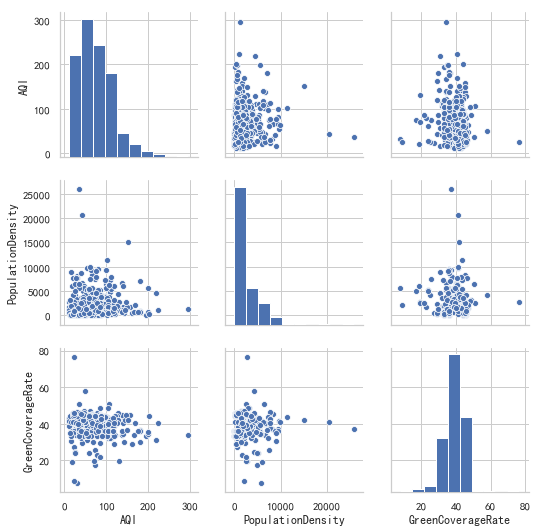

In [41]:
sns.pairplot(data[['AQI','PopulationDensity','GreenCoverageRate']])

# 相关系数


In [42]:
data.corr()

,AQI,Precipitation,GDP,Temperature,Longitude,Latitude,Altitude,PopulationDensity,Coastal,GreenCoverageRate,"Incineration(10,000ton)"
AQI,1.000000,-0.401844,0.160341,-0.283956,0.093900,0.552652,-0.204753,-0.026496,-0.150656,-0.097734,0.106898
Precipitation,-0.401844,1.000000,0.176665,0.685447,0.223211,-0.656175,-0.324124,0.067047,0.259783,0.153291,0.201174
GDP,0.160341,0.176665,1.000000,0.145780,0.173041,-0.010124,-0.208952,0.229402,0.174241,-0.039220,0.899550
Temperature,-0.283956,0.685447,0.145780,1.000000,0.141277,-0.807119,-0.459426,0.144923,0.305894,0.216575,0.173590
Longitude,0.093900,0.223211,0.173041,0.141277,1.000000,0.173585,-0.737548,-0.121986,0.374889,0.156439,0.072068
Latitude,0.552652,-0.656175,-0.010124,-0.807119,0.173585,1.000000,0.002571,-0.167384,-0.204199,-0.142776,-0.081412
Altitude,-0.204753,-0.324124,-0.208952,-0.459426,-0.737548,0.002571,1.000000,-0.031408,-0.271570,-0.182449,-0.122192
PopulationDensity,-0.026496,0.067047,0.229402,0.144923,-0.121986,-0.167384,-0.031408,1.000000,-0.034158,0.021197,0.283563
Coastal,-0.150656,0.259783,0.174241,0.305894,0.374889,-0.204199,-0.271570,-0.034158,1.000000,0.264419,0.158850
GreenCoverageRate,-0.097734,0.153291,-0.039220,0.216575,0.156439,-0.142776,-0.182449,0.021197,0.264419,1.000000,-0.029088


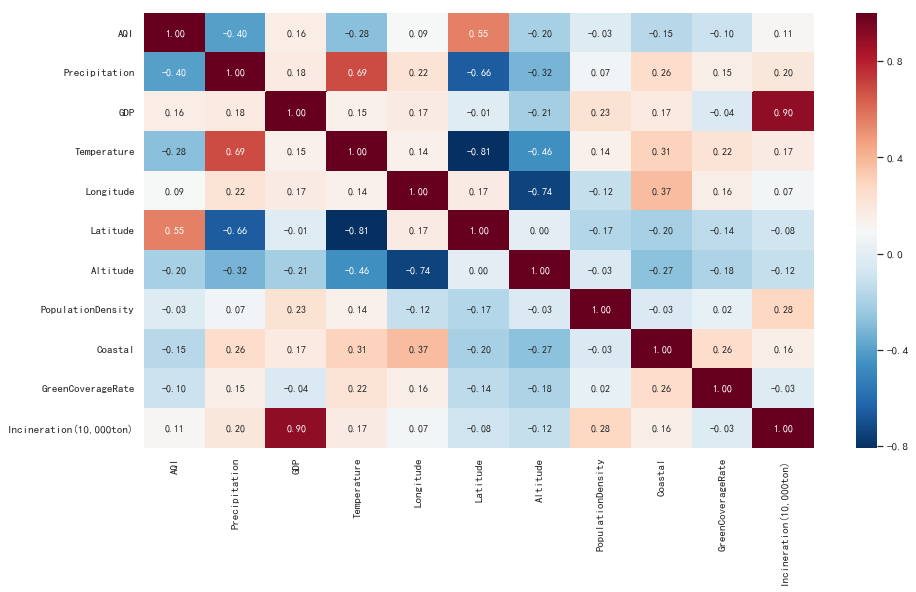

In [43]:
plt.figure(figsize =(15,8))
sns.heatmap(data.corr(),cmap = plt.cm.RdBu_r,annot =True ,fmt = '.2f')

gdp 与 焚烧量 incineration 正相关（0.9）


# 机器学习 

In [45]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
X = data.drop(['City','AQI'],axis = 1)
y = data['AQI']
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25,random_state=0)

In [46]:
lr = LinearRegression()
lr.fit(X_train,y_train)
y_hat = lr.predict(X_test)
print(lr.score(X_train,y_train))
print(lr.score(X_test,y_test))

0.4685357478390666
0.30759980354177274


Text(0.5,1,'预测回归')

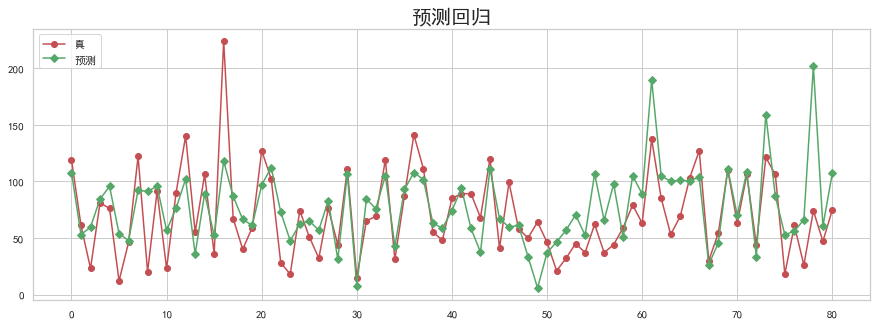

In [47]:
plt.figure(figsize=(15,5))
plt.plot(y_test.values,'-r',label='真', marker='o')
plt.plot(y_hat,'-g',label='预测', marker='D')
plt.legend()
plt.title('预测回归',fontsize=20)

# 残差分析 


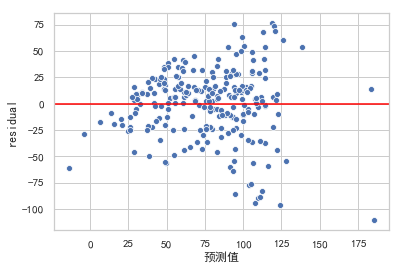

In [48]:
y_hat_train = lr.predict(X_train)
residual = y_hat_train - y_train.values
plt.xlabel('预测值')
plt.ylabel('residual')
plt.axhline(y=0,color='red')
sns.scatterplot(x=y_hat_train,y=residual)


# 进行标准化  ,去掉异常值 



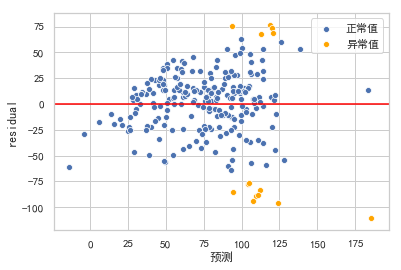

In [49]:
r = (residual - residual.mean())/residual.std()
y_hat_train[np.abs(r) >2]
plt.xlabel('预测')
plt.ylabel('residual')
plt.axhline(y=0,color='red')
sns.scatterplot(x=y_hat_train[np.abs(r)<=2],y=residual[np.abs(r)<=2],color = 'b',label='正常值')
sns.scatterplot(x=y_hat_train[np.abs(r)>2],y=residual[np.abs(r)>2],color = 'orange',label='异常值')


In [50]:
X_train= X_train[np.abs(r)<=2]
y_train =y_train[np.abs(r)<=2]

#  有提高 

In [51]:
lr.fit(X_train,y_train)
y_hat = lr.predict(X_test)
print(lr.score(X_train,y_train))
print(lr.score(X_test,y_test))

0.5141723293897302
0.39228519746736223


# 线性模型 效果明显不好
## 尝试随机森林,明显提高

In [52]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(n_estimators=500,random_state=0)
rf.fit(X_train,y_train)
y_hat = lr.predict(X_test)
print(rf.score(X_train,y_train))
print(rf.score(X_test,y_test))


0.9457114222267299
0.5661394072541562


Text(0.5,1,'随机森林回归')

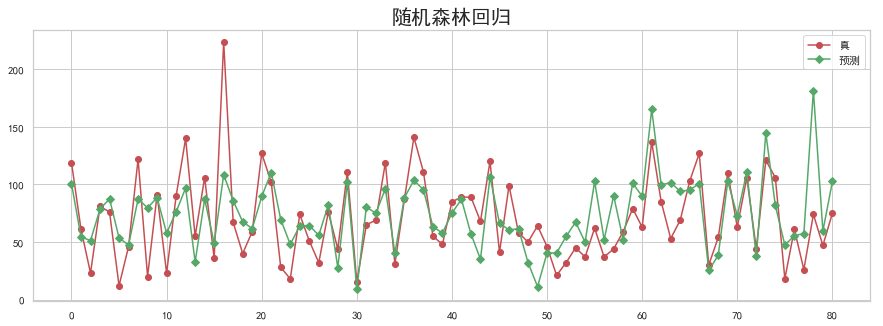

In [53]:
plt.figure(figsize=(15,5))
plt.plot(y_test.values,'-r',label='真', marker='o')
plt.plot(y_hat,'-g',label='预测', marker='D')
plt.legend()
plt.title('随机森林回归',fontsize=20)